In [588]:
import pandas as pd
import os, MySQLdb
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
%config InlineBackend.figure_formats = ['svg']

### Extract Possible Stats

In [68]:
r = []
for i in [2018, 2019, 2020]:
    basedir = os.path.join(os.getcwd(), f'phs_{i}', '')
    for f in os.listdir(basedir):
        df = pd.read_csv(basedir + f)
        if 'hero' in df.columns.tolist():
            tmp = df[df['hero'] == 'All Heroes']['stat_name']
        elif 'hero_name' in df.columns.tolist():
            tmp = df[df['hero_name'] == 'All Heroes']['stat_name']

        r = list(set(r + tmp.to_list()))

r = set(r)
print(len(r))

36


### Construct Empty Table

In [302]:
table = pd.DataFrame(columns=sorted(r))
table.columns

Index(['All Damage Done', 'Assists', 'Average Time Alive',
       'Barrier Damage Done', 'Damage - Quick Melee', 'Damage Blocked',
       'Damage Done', 'Damage Taken', 'Deaths', 'Defensive Assists',
       'Eliminations', 'Environmental Deaths', 'Environmental Kills',
       'Final Blows', 'Healing Done', 'Hero Damage Done', 'Knockback Kills',
       'Melee Final Blows', 'Melee Percentage of Final Blows', 'Multikills',
       'Objective Kills', 'Objective Time', 'Offensive Assists',
       'Recon Assists', 'Shots Fired', 'Solo Kills',
       'Teleporter Pads Destroyed', 'Time Alive', 'Time Building Ultimate',
       'Time Elapsed per Ultimate Earned', 'Time Holding Ultimate',
       'Time Played', 'Turrets Destroyed', 'Ultimates Earned - Fractional',
       'Ultimates Used', 'Weapon Accuracy'],
      dtype='object')

### Construct Table

In [303]:
PLAYER = []
for i in [2018, 2019, 2020]:
    basedir = os.path.join(os.getcwd(), f'phs_{i}', '')
    for f in sorted(list(os.listdir(basedir))):
        df = pd.read_csv(basedir + f)
        col = df.columns.tolist()
        for j in df.itertuples():
            if 'player' in col:
                rown = f'{j.player.lower()}{i}'
            elif 'player_name' in col:
                rown = f'{j.player_name.lower()}{i}'
            
            try:
                if str(j.hero).lower() == 'all heroes':
                    table.loc[rown, j.stat_name] = j.stat_amount
                    PLAYER.append(rown)
            except:
                if str(j.hero_name).lower() == 'all heroes':
                    table.loc[rown, j.stat_name] = j.stat_amount
                    PLAYER.append(rown)

        print(f"{f}\t\t{table.shape}")

PLAYER = set(PLAYER)

phs_2018_playoffs.csv		(44, 36)
phs_2018_stage_1.csv		(105, 36)
phs_2018_stage_2.csv		(112, 36)
phs_2018_stage_3.csv		(123, 36)
phs_2018_stage_4.csv		(129, 36)
phs_2019_playoffs.csv		(212, 36)
phs_2019_stage_1.csv		(297, 36)
phs_2019_stage_2.csv		(312, 36)
phs_2019_stage_3.csv		(331, 36)
phs_2019_stage_4.csv		(336, 36)
phs_2020_1.csv		(542, 36)
phs_2020_2.csv		(549, 36)


In [305]:
extract = sorted(set([i[:-4] for i in PLAYER]))
extract

['ado',
 'adora',
 'agilities',
 'aid',
 'aimgod',
 'akm',
 'alarm',
 'alemao',
 'altering',
 'although',
 'ameng',
 'anamo',
 'ans',
 'apply',
 'architect',
 'arhan',
 'ark',
 'asher',
 'ating',
 'axxiom',
 'babel',
 'babybay',
 'baconjack',
 'bani',
 'bazzi',
 'bdosin',
 'beast',
 'bebe',
 'benbest',
 'bernar',
 'bianca',
 'bigg00se',
 'birdring',
 'bischu',
 'blase',
 'blasé',
 'boink',
 'boombox',
 'bqb',
 'brussen',
 'bumper',
 'bunny',
 'byrem',
 'carcar',
 'carpe',
 'chara',
 'chipsa',
 'chipshajen',
 'choihyobin',
 'clestyn',
 'clockwork',
 'closer',
 'cocco',
 'coldest',
 'colourhex',
 'coma',
 'coolmatt',
 'corey',
 'cr0ng',
 'creative',
 'crimzo',
 'custa',
 'cwoosh',
 'daco',
 'daemin',
 'dafran',
 'dalton',
 'danteh',
 'danye',
 'dayfly',
 'dding',
 'decay',
 'dhak',
 'diem',
 'diya',
 'dogman',
 'doha',
 'dpi',
 'dreamer',
 'dreamkazper',
 'edison',
 'effect',
 'eileen',
 'elk',
 'ellivote',
 'elsa',
 'envy',
 'eqo',
 'erster',
 'fahzix',
 'fate',
 'fctfctn',
 'fdgod',
 '

In [289]:
table

,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,Damage Done,Damage Taken,Deaths,Defensive Assists,...,Teleporter Pads Destroyed,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Turrets Destroyed,Ultimates Earned - Fractional,Ultimates Used,Weapon Accuracy
gamsu2018,11018.6,25,122.151,1962.79,455.86,11279.5,9055.81,12565.7,6,4,...,NaN,675.878,625.556,101.119,135.755,803.059,NaN,6.18632,5,0.548611
kellex2018,6654.15,9,55.1209,2834.15,60,NaN,3795,4426.78,6,21,...,NaN,675.876,596.574,93.1689,99.221,735.858,NaN,6.40314,4,0.261084
mistakes2018,17412.8,14,89.7347,5058.2,92.4971,803.716,12106,5693.03,5,6,...,NaN,668.003,663.436,74.1882,112.053,803.059,NaN,8.94261,6,0.386288
neko2018,14863,15,133.274,4083.15,260.641,56,10776.8,5450.3,5,29,...,NaN,686.058,599.779,83.4366,165.67,803.059,NaN,7.18844,6,0.344029
note2018,18346.8,14,85.7364,6691.16,72.9168,8057.53,11406.2,13052.4,4,3,...,NaN,685.891,580.801,103.303,220.682,803.059,NaN,5.62229,21,0.349774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ta1yo2020,7800.42,11,148.417,2816.69,159,NaN,4983.73,2373.83,2,NaN,...,NaN,296.834,277.616,91.0928,4.216,296.859,NaN,3.04762,2,0.222477
bianca2020,8795.79,7,110.698,893.649,30,16020,6502.24,13303.2,7,2,...,NaN,715.983,653.146,63.858,125.446,780.667,NaN,10.2281,8,0.194922
lr1s2020,4055.07,5,76.9573,811.52,30,NaN,3243.55,2609.69,3,6,...,NaN,307.829,237.515,50.9873,68.934,336.807,NaN,4.65831,4,0.111111
saucy2020,8106.02,10,110.966,2981.3,60,5759.41,5109.72,2755.66,4,NaN,...,NaN,665.795,522.026,110.989,158.902,695.897,4,4.70339,3,0.404231


### Filter Columns w/ High Missingness

In [290]:
prop = 0.1
tokeep = ~(table.isnull().sum() > prop * table.shape[0])
r1_table = table[tokeep.iloc[tokeep.values].index]
print(f"Removing columns with >{prop} missingness\nLeft with {r1_table.shape[1]} stats")
print("*" * 30)
print(f"Current Missingness report")
print(r1_table.isnull().sum() / table.shape[0] * 100)

Removing columns with >0.1 missingness
Left with 28 stats
******************************
Current Missingness report
All Damage Done                     0.182149
Assists                             0.182149
Average Time Alive                  0.728597
Barrier Damage Done                 0.182149
Damage - Quick Melee                1.457195
Damage Done                         3.278689
Damage Taken                        3.096539
Deaths                              0.364299
Eliminations                        0.182149
Environmental Deaths                8.014572
Final Blows                         0.182149
Hero Damage Done                    0.182149
Melee Final Blows                   6.193078
Melee Percentage of Final Blows     6.193078
Multikills                          5.282332
Objective Kills                     0.364299
Objective Time                      0.000000
Offensive Assists                   2.914390
Shots Fired                         0.910747
Solo Kills                   

### Impute Missing Values

In [291]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
r2_table = imp_mean.fit_transform(r1_table)
r2_table = pd.DataFrame(r2_table, columns=r1_table.columns, index=r1_table.index)
assert (r2_table.isnull().sum().values == 0).all()
r2_table

,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Done,Damage Taken,Deaths,Eliminations,Environmental Deaths,...,Shots Fired,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Weapon Accuracy
gamsu2018,11018.600720,25.0,122.150879,1962.792554,455.859944,9055.808162,12565.747800,6.0,30.0,1.000000,...,810.0,1.0,675.878021,625.556018,101.119279,135.755004,803.058990,6.186318,5.0,0.548611
kellex2018,6654.146255,9.0,55.120891,2834.146255,60.000000,3795.000000,4426.775113,6.0,9.0,1.000000,...,809.0,1.0,675.876020,596.574017,93.168926,99.221003,735.858478,6.403144,4.0,0.261084
mistakes2018,17412.776710,14.0,89.734669,5058.199062,92.497137,12105.959560,5693.025097,5.0,24.0,1.000000,...,1412.0,1.0,668.003020,663.436019,74.188223,112.053003,803.058990,8.942606,6.0,0.386288
neko2018,14862.974460,15.0,133.274004,4083.153479,260.641460,10776.820980,5450.304399,5.0,23.0,1.000000,...,713.0,2.0,686.058021,599.779017,83.436590,165.670005,803.058990,7.188441,6.0,0.344029
note2018,18346.830110,14.0,85.736378,6691.161931,72.916759,11406.206500,13052.415760,4.0,28.0,1.000000,...,20039.0,2.0,685.891020,580.801017,103.303350,220.682006,803.058990,5.622286,21.0,0.349774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ta1yo2020,7800.417480,11.0,148.417004,2816.689651,159.000000,4983.727828,2373.825726,2.0,16.0,1.184158,...,529.0,1.0,296.834009,277.616008,91.092753,4.216000,296.858802,3.047619,2.0,0.222477
bianca2020,8795.790688,7.0,110.697753,893.648767,30.000000,6502.239303,13303.183119,7.0,13.0,1.000000,...,11132.0,1.0,715.983022,653.146019,63.858027,125.446004,780.667209,10.228096,8.0,0.194922
lr1s2020,4055.066810,5.0,76.957252,811.519937,30.000000,3243.546873,2609.690491,3.0,6.0,1.000000,...,10.0,1.0,307.829009,237.515006,50.987335,68.934002,336.807380,4.658314,4.0,0.111111
saucy2020,8106.018867,10.0,110.965837,2981.296954,60.000000,5109.721913,2755.660169,4.0,13.0,1.000000,...,2293.0,2.0,665.795020,522.026016,110.989273,158.902005,695.896706,4.703392,3.0,0.404231


### Scale Stats

In [394]:
scaler = MinMaxScaler()
r3_table = scaler.fit_transform(r2_table)
r3_table = pd.DataFrame(r3_table, columns=r1_table.columns, index=r1_table.index)
r3_table.columns

Index(['All Damage Done', 'Assists', 'Average Time Alive',
       'Barrier Damage Done', 'Damage - Quick Melee', 'Damage Done',
       'Damage Taken', 'Deaths', 'Eliminations', 'Environmental Deaths',
       'Final Blows', 'Hero Damage Done', 'Melee Final Blows',
       'Melee Percentage of Final Blows', 'Multikills', 'Objective Kills',
       'Objective Time', 'Offensive Assists', 'Shots Fired', 'Solo Kills',
       'Time Alive', 'Time Building Ultimate',
       'Time Elapsed per Ultimate Earned', 'Time Holding Ultimate',
       'Time Played', 'Ultimates Earned - Fractional', 'Ultimates Used',
       'Weapon Accuracy'],
      dtype='object')

### Filtering Features given domain specific knowledge

In [395]:
r3_table = r3_table.drop(['Shots Fired'], axis=1)
r3_table.shape

(549, 27)

### Visualize Missingness

All Damage Done                       1
Assists                               1
Average Time Alive                    4
Barrier Damage Done                   1
Damage - Quick Melee                  8
Damage Blocked                       82
Damage Done                          18
Damage Taken                         17
Deaths                                2
Defensive Assists                   146
Eliminations                          1
Environmental Deaths                 44
Environmental Kills                 155
Final Blows                           1
Healing Done                         70
Hero Damage Done                      1
Knockback Kills                     356
Melee Final Blows                    34
Melee Percentage of Final Blows      34
Multikills                           29
Objective Kills                       2
Objective Time                        0
Offensive Assists                    16
Recon Assists                       365
Shots Fired                           5


<AxesSubplot:>

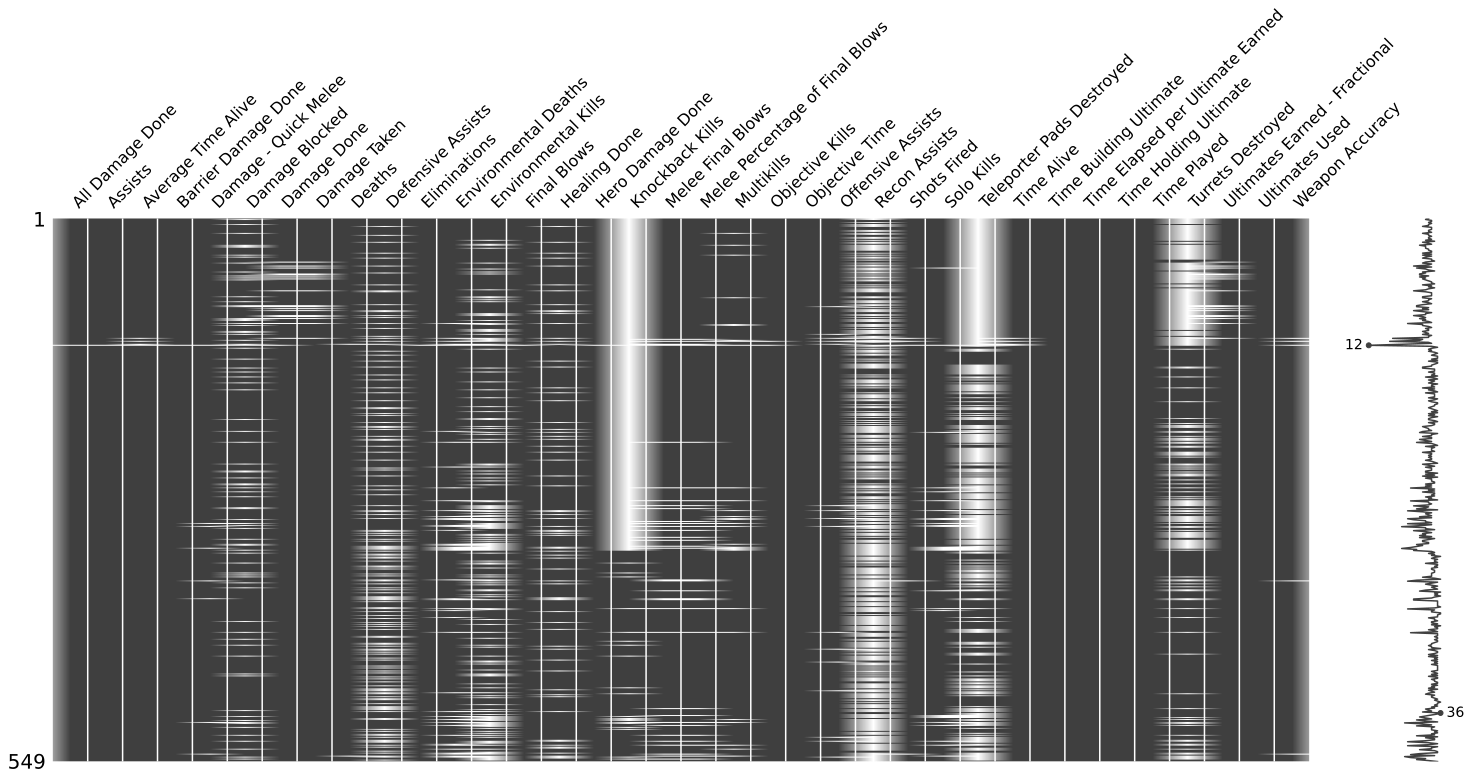

In [396]:
#table[table.columns[~table.isnull().all()]]
print(table.isnull().sum())
msno.matrix(table)

<AxesSubplot:>

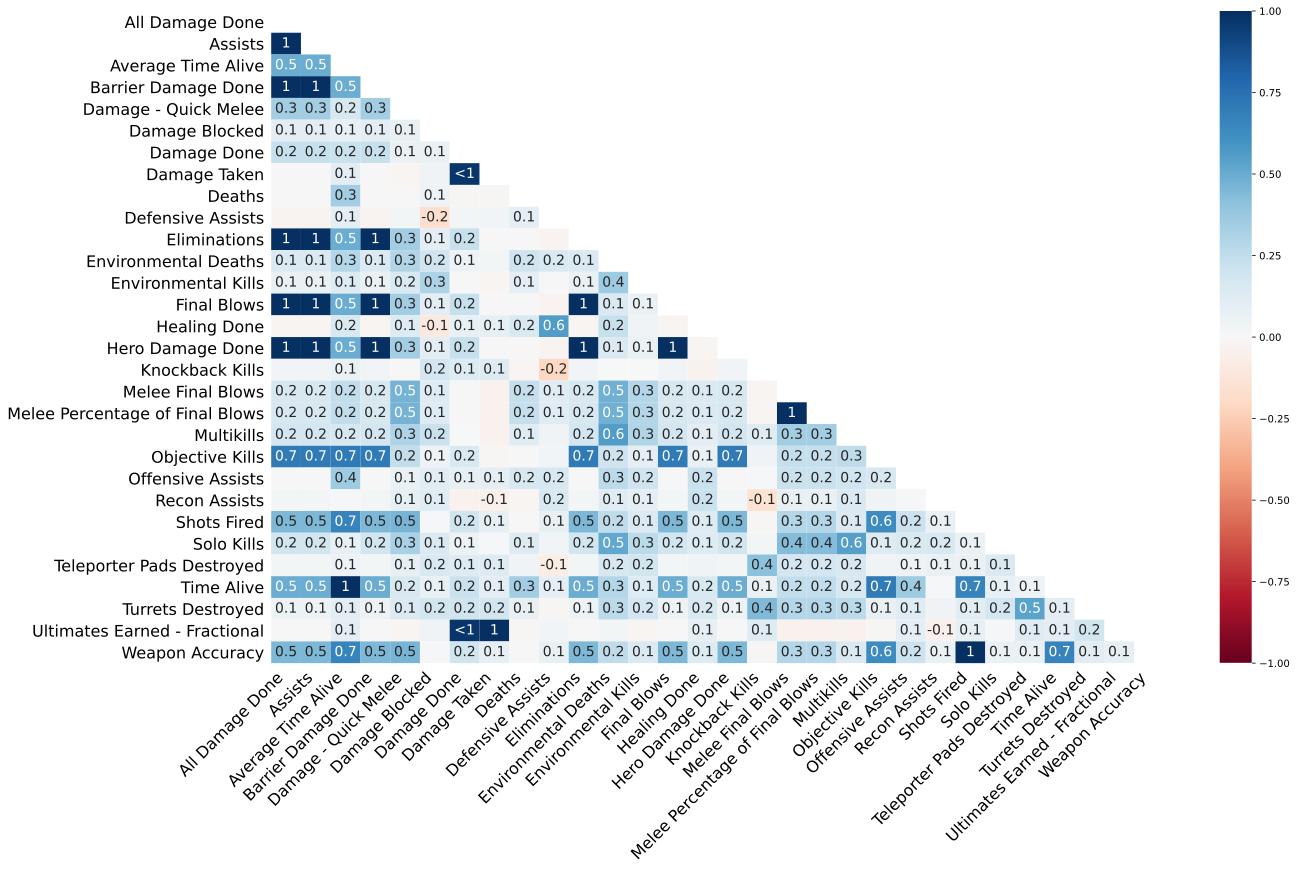

In [397]:
msno.heatmap(table)

### Compute Accuracy

***accuracy*** a map between interested element and corresponding accuracy

***lib*** a map details the team that players are on, in a specific year

***record*** team's winning rate in specific years

In [398]:
accuracy = dict(zip(r3_table.index, [-1 for i in range(r3_table.shape[0])]))

In [399]:
player_hist = pd.read_csv('player_history.csv', index_col=0)
players = set(player_hist['Player Name'].values.tolist())
lib = {}
for i in players:
    for j in range(2018, 2021):
        lib[f"{i.lower()}{j}"] = []

for p in player_hist.itertuples():
    try:
        sy = int(p.start_time.split('-')[0]) if p.start_time != 'Present' else 2020
        ey = int(  p.end_time.split('-')[0]) if p.end_time   != 'Present' else 2020
        if sy <= 2018 and ey >= 2018:
            lib[f"{p._1.lower()}2018"].append(p.Team)
        if sy <= 2019 and ey >= 2019:
            lib[f"{p._1.lower()}2019"].append(p.Team)
        if sy <= 2020 and ey >= 2020:
            lib[f"{p._1.lower()}2020"].append(p.Team)
        if ey < 2018:
            continue
        
    except:
        print(p)


Pandas(Index=48, _1='Apply', start_time='201?-??-??', end_time='2017-12-18', Team='Sinatraas rap playlist')
Pandas(Index=160, _1='Carcar', start_time='201?-??-??', end_time='2017-12-18', Team='Sinatraas rap playlist')
Pandas(Index=176, _1='Chipshajen', start_time='2015-??-??', end_time='201?-??-??', Team='HULKTastic')
Pandas(Index=672, _1='KSF', start_time='201?-??-??', end_time='2017-01-??', Team='EnVision eSports')
Pandas(Index=752, _1='Kyo', start_time='????-??-??', end_time='2016-08-31', Team='Oversalt')
Pandas(Index=791, _1='LiNkzr', start_time='2015-11-16', end_time='201?-??-??', Team=' DEALWITHPEPE')
Pandas(Index=1016, _1='Paintbrush', start_time='201?-??-??', end_time='2018-02-??', Team='No Clout')
Pandas(Index=1111, _1='SADO', start_time='2020-11-21', end_time=' Present', Team=' Toronto Defiant')
Pandas(Index=1206, _1='Snow_(Brazilian_player)', start_time='201?-??-??', end_time='201?-??-??', Team='Lightning Storm')
Pandas(Index=1207, _1='Snow_(Brazilian_player)', start_time='2

#### See descriptions above for comments

In [400]:
df = pd.read_csv("match_map_stats.csv")
for i in range(2018, 2021):
    line = df['round_end_time'].str.contains(str(i), na=-1, regex=False)
    l = df.iloc[np.where(line.values)[0]]
    teams = l[['map_winner', 'map_loser']].values.flatten()
    teams = set(teams)
    teams.remove('draw')
    record = dict(zip(teams, [np.array([0.0, 0.0]) for i in range(len(teams))]))

    for j in l[['map_winner', 'map_loser', 'team_one_name', 'team_two_name']].values:
        if j[0].lower() != 'draw':
            record[j[0]] += [1, 1]
            record[j[1]] += [0, 1]
        else:
            record[j[2]] += [0.5, 1]
            record[j[3]] += [0.5, 1]
    
    # Sanity Check Total Pts should be half of total number of games
    l = np.array([0.0, 0.0])
    for m, n in record.items():
        l += n
    assert l[0] * 2 == l[1]

    # For all players in list
    for p in extract:
        entry = f"{p}{i}"
        # If we are interested in this player's performance in this year
        if entry in accuracy:
            # If we know the teams of player+year combination
            if entry in lib:
                t = lib[entry]
                score, count = 0.0, 0.0
                for l in t:
                    if l.strip() in record:
                        score += record[l.strip()][0] / record[l.strip()][1]  
                        count += 1
                # If we can find at least winning rate 
                # of one team that player played on
                if count != 0:
                    accuracy[entry] = score / count
                else:
                    print(f"{entry}\t{t}")
            else:
                print(entry)

    print(set(teams))


snow2018
{'San Francisco Shock', 'Los Angeles Gladiators', 'Seoul Dynasty', 'Florida Mayhem', 'London Spitfire', 'Los Angeles Valiant', 'Philadelphia Fusion', 'Houston Outlaws', 'Boston Uprising', 'Shanghai Dragons', 'Dallas Fuel', 'New York Excelsior'}
kyo2019	['XTEN Esports', 'T1me']
{'Los Angeles Gladiators', 'Seoul Dynasty', 'Hangzhou Spark', 'Paris Eternal', 'Houston Outlaws', 'Los Angeles Valiant', 'Shanghai Dragons', 'Dallas Fuel', 'Atlanta Reign', 'New York Excelsior', 'Chengdu Hunters', 'Washington Justice', 'San Francisco Shock', 'Florida Mayhem', 'London Spitfire', 'Toronto Defiant', 'Boston Uprising', 'Philadelphia Fusion', 'Guangzhou Charge', 'Vancouver Titans'}
beast2020	['Dignity']
blase2020
kyo2020	[]
{'Los Angeles Gladiators', 'Jehong and Students', 'Hangzhou Spark', 'Seoul Dynasty', 'Team Jake', 'Team Custa', 'Paris Eternal', 'Triple A', 'Team Reinhardt', 'Los Angeles Valiant', 'Houston Outlaws', 'Team Universe', 'Shanghai Dragons', 'Dallas Fuel', 'Atlanta Reign', 'Ne

In [541]:
acc = pd.DataFrame.from_dict(accuracy, orient='index',
                       columns=['accuracy'])
r4 = pd.concat([r3_table, acc], axis=1)
r5 = r4.iloc[(np.where((r4['accuracy'] != -1) == True)[0])]

In [559]:
X = r5.values[:,:-1]
y = r5.values[:, -1]

In [543]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor
from sklearn import svm, tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [544]:
num_model, num_split = 8, 10

kf = KFold(n_splits=num_split, shuffle=True)
ev = np.zeros(num_model)
mae = np.zeros(num_model)
mse = np.zeros(num_model)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = Ridge(alpha=1).fit(X_train, y_train)
    ev[0] += explained_variance_score(y_test, clf.predict(X_test))
    mae[0] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[0] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = LinearRegression().fit(X_train, y_train)
    ev[1] += explained_variance_score(y_test, clf.predict(X_test))
    mae[1] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[1] += mean_squared_error(y_test, clf.predict(X_test))

    clf = svm.SVR().fit(X_train, y_train)
    ev[2] += explained_variance_score(y_test, clf.predict(X_test))
    mae[2] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[2] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = SGDRegressor(max_iter=1e7, tol=1e-10).fit(X_train, y_train)
    ev[3] += explained_variance_score(y_test, clf.predict(X_test))
    mae[3] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[3] += mean_squared_error(y_test, clf.predict(X_test))

    clf = tree.DecisionTreeRegressor().fit(X_train, y_train)
    ev[4] += explained_variance_score(y_test, clf.predict(X_test))
    mae[4] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[4] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = RandomForestRegressor(max_depth=5, min_samples_split=4).fit(X_train, y_train)
    ev[5] += explained_variance_score(y_test, clf.predict(X_test))
    mae[5] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[5] += mean_squared_error(y_test, clf.predict(X_test))

    clf = ExtraTreesRegressor(max_depth=5, min_samples_split=4).fit(X_train, y_train)
    ev[6] += explained_variance_score(y_test, clf.predict(X_test))
    mae[6] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[6] += mean_squared_error(y_test, clf.predict(X_test))

    clf = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='exponential').fit(X_train, y_train)
    ev[7] += explained_variance_score(y_test, clf.predict(X_test))
    mae[7] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[7] += mean_squared_error(y_test, clf.predict(X_test))    
    
    
print(ev/num_split)
print(mae/num_split)
print(mse/num_split)

[ 0.03594701  0.01993285 -0.03901248  0.01582399 -0.83164429  0.0636479
  0.06355848  0.04435741]
[0.09329615 0.09411371 0.09758309 0.09426642 0.11978601 0.09267668
 0.09203429 0.09464098]
[0.01448432 0.01467497 0.01558001 0.01484523 0.02611728 0.01418449
 0.0143951  0.01471269]


##### We see that RandomForest has the best performance, thus we will perform feature selection based on this model

In [528]:
from sklearn.feature_selection import SelectFromModel

In [553]:
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train, y_train)
#selector = SelectFromModel(estimator=Ridge()).fit(X_train, y_train)
loc = np.where(selector.get_support() == True)[0]

In [560]:
r6 = pd.concat([r3_table.iloc[:, loc], acc], axis=1)
r6 = r6.iloc[(np.where((r6['accuracy'] != -1) == True)[0])]
X = r6.values[:,:-1]
y = r6.values[:, -1]

In [563]:
num_model, num_split = 8, 10

kf = KFold(n_splits=num_split, shuffle=True)
ev = np.zeros(num_model)
mae = np.zeros(num_model)
mse = np.zeros(num_model)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = Ridge(alpha=1).fit(X_train, y_train)
    ev[0] += explained_variance_score(y_test, clf.predict(X_test))
    mae[0] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[0] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = LinearRegression().fit(X_train, y_train)
    ev[1] += explained_variance_score(y_test, clf.predict(X_test))
    mae[1] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[1] += mean_squared_error(y_test, clf.predict(X_test))

    clf = svm.SVR().fit(X_train, y_train)
    ev[2] += explained_variance_score(y_test, clf.predict(X_test))
    mae[2] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[2] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = SGDRegressor(max_iter=1e7, tol=1e-10).fit(X_train, y_train)
    ev[3] += explained_variance_score(y_test, clf.predict(X_test))
    mae[3] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[3] += mean_squared_error(y_test, clf.predict(X_test))

    clf = tree.DecisionTreeRegressor().fit(X_train, y_train)
    ev[4] += explained_variance_score(y_test, clf.predict(X_test))
    mae[4] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[4] += mean_squared_error(y_test, clf.predict(X_test))
    
    clf = RandomForestRegressor(max_depth=5, min_samples_split=4).fit(X_train, y_train)
    ev[5] += explained_variance_score(y_test, clf.predict(X_test))
    mae[5] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[5] += mean_squared_error(y_test, clf.predict(X_test))

    clf = ExtraTreesRegressor(max_depth=5, min_samples_split=4).fit(X_train, y_train)
    ev[6] += explained_variance_score(y_test, clf.predict(X_test))
    mae[6] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[6] += mean_squared_error(y_test, clf.predict(X_test))

    clf = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='exponential').fit(X_train, y_train)
    ev[7] += explained_variance_score(y_test, clf.predict(X_test))
    mae[7] += mean_absolute_error(y_test, clf.predict(X_test))
    mse[7] += mean_squared_error(y_test, clf.predict(X_test))    
    
    
print(ev/num_split)
print(mae/num_split)
print(mse/num_split)

[ 0.05769958  0.054562    0.06851199  0.05247716 -0.83343108  0.13011495
  0.10888039  0.08726827]
[0.09212655 0.09246354 0.09487532 0.09254861 0.12389743 0.08991872
 0.08958281 0.09259161]
[0.01443161 0.0144563  0.01427247 0.0145432  0.02703417 0.01341487
 0.01375093 0.01404259]


##### Based on experimentation, we see that RandomForest Regressor can consistently outperform other ML models (it has the highest explained_variance_score). To generate winning rate for all players, we will fit a RF model on the entire dataset and predict on all of it. Although this action causes overfitting, we are not that worried about high bias in this case.

In [569]:
kf = KFold(n_splits=num_split, shuffle=True, random_state=10)
clf = RandomForestRegressor(max_depth=5, min_samples_split=4).fit(X, y)
m = clf.predict(X)

In [576]:
prediction = dict(zip(r6.index, m))

In [584]:
final = {}
for p in extract:
    a, c = 0, 0
    for y in range(2018, 2021):
        entry = f"{p}{y}"
        if entry in prediction:
            a += prediction[entry]
            c += 1
    if c != 0:
        final[p] = a/c
            

In [604]:
final = {k: v for k, v in sorted(final.items(), key=lambda item: item[1], reverse=True)}

In [605]:
database = MySQLdb.connect(host="dbase.cs.jhu.edu", user="20fa_rzhai2", passwd="AgadM8or", db="20fa_rzhai2_db")
cursor = database.cursor()
query = "INSERT INTO Predict(PlayerName, WinningRate) VALUES (%s, %s)"

In [606]:
def rebuild_Predict_table():
    cursor.execute("DROP TABLE Predict")
    definition = (f"CREATE TABLE Predict(PlayerName VARCHAR(50), WinningRate FLOAT(40, 20), PRIMARY KEY (PlayerName))")
    cursor.execute(definition)
    print("Re-built")
    
rebuild_Predict_table()

Re-built


In [607]:
def view_table(name):
    cursor.execute(f"SELECT * FROM {name}")
    myresult = cursor.fetchall()
    for x in myresult:
        print(x)

In [608]:
cursor.execute("TRUNCATE TABLE Predict")
for k, v in final.items():
    cursor.execute(query, (k, v))
    
print(f"{len(final)} entries inserted")
view_table("Predict")
database.commit()
cursor.close()
database.close()

316 entries inserted
('ado', 0.4539927542209625)
('adora', 0.48634347319602966)
('agilities', 0.513909101486206)
('aid', 0.37985432147979736)
('aimgod', 0.49795717000961304)
('akm', 0.48398473858833313)
('alarm', 0.49856096506118774)
('alemao', 0.4548761546611786)
('altering', 0.21004971861839294)
('although', 0.4892449378967285)
('ameng', 0.48182347416877747)
('anamo', 0.45456352829933167)
('ans', 0.5089349150657654)
('apply', 0.46998539566993713)
('architect', 0.5149344801902771)
('arhan', 0.4551894962787628)
('ark', 0.5075376033782959)
('asher', 0.4799196422100067)
('ating', 0.4854169487953186)
('axxiom', 0.4741210639476776)
('babel', 0.43349510431289673)
('babybay', 0.4858238101005554)
('baconjack', 0.46968981623649597)
('bani', 0.4599212408065796)
('bazzi', 0.4747428596019745)
('bdosin', 0.48335039615631104)
('bebe', 0.5157465934753418)
('benbest', 0.4570457339286804)
('bernar', 0.46731582283973694)
('bianca', 0.4646148383617401)
('bigg00se', 0.46287134289741516)
('birdring', 0.49